# Demo

Demo notebook showing functionalities of the GPGO implementations

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from gpgo import one_step_lookahead, compute_rhos, run_experiment
from gpgo.sample import sample_marginalized_posterior, sample_posterior
from gpgo.plot_utils import plot_onestep_1d, plot_samples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot marginalized posterior samples

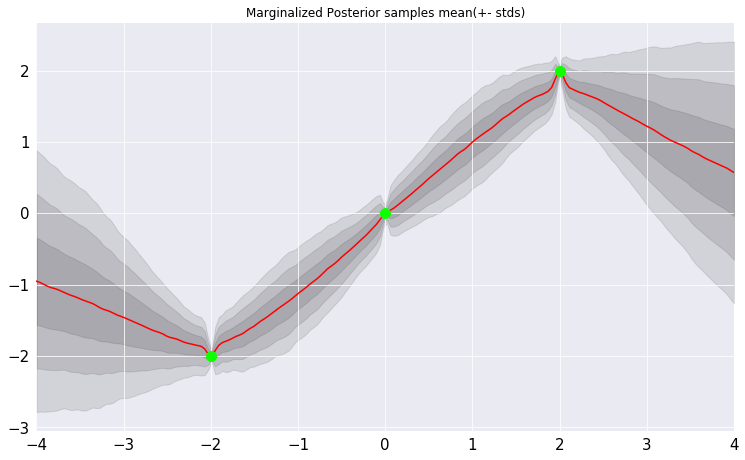

In [7]:
# Test sampleMarginalizedPosterior
N = 200
x = np.linspace(-4,4,N).reshape((N, 1))

# prior knowledge
x0 = np.array([-2, 0, 2]).reshape((-1, 1))
y0 = np.array([-2, 0, 2]).reshape((-1, 1))

theta_prior = np.array([1, 1, 1, 1, 0])
theta_dist_cov = np.eye(5)
theta_space_cov = np.eye(5)
theta_sample_count = 32

rho, theta_S = compute_rhos(theta_prior, theta_dist_cov, theta_space_cov, theta_sample_count, x0, y0)
Y = sample_marginalized_posterior(x, rho, theta_S, x0 = x0, y0 = y0, samples = 1000)

plot_samples(x, Y, x0, y0, plt.gcf(), 'Marginalized Posterior samples mean(+- stds)')

# Run GPGO to find the minima of $2 sin(x)$

In [11]:
test_fn = lambda x: 2*np.sin(x)
x0 = np.array([[0.0]])
y_opt = -2.0 # true minima

# shape 2 x d; box, which constrains the search space by setting expLoss to inf outside of it
test_box = np.array([[-2*np.pi], # min along each dim
                     [2*np.pi]]) # max along each dim

x_evals = run_experiment(test_fn, x0, test_box, max_iter=10, 
                         noise=None, periodic=True, disp=True)

iter 1/10
theta prior: [1. 1. 1. 1. 0.]
initial guess: [-4.5632065]


AssertionError: 

In [7]:
def Himmelblaus(x_vals):
    
    x = x_vals[:,0]
    y = x_vals[:, 1]
    
    return np.square(np.square(x) + y - 11) + np.square(x + np.square(y) - 7)
    
def Rosenbrock(x_vals):
    
    x = x_vals[:,0]
    y = x_vals[:, 1]
    
    return np.square(1-x) + 2*np.square(y-np.square(x))

Step 1
Step 2
Step 3


C:\Users\Aiko\Desktop\gpgo.py:140: RuntimeWarning: invalid value encountered in true_divide
  rho = weighted_rS / (onesT.dot(weighted_rS))
c:\users\aiko\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64

Steps to current minimum: 52

 1 ) minimal evaluation:  6.702813989394289 @ x_opt = [[ 3.74988542 -2.39848293]]

 2 ) minimal evaluation:  10.059503897376723 @ x_opt = [[ 3.3332896 -0.7481529]]

 3 ) minimal evaluation:  11.893728292873696 @ x_opt = [[-2.13790071  2.98729579]]

 4 ) minimal evaluation:  12.069992389063149 @ x_opt = [[ 3.84830996 -1.03190337]]

 5 ) minimal evaluation:  12.823525441817015 @ x_opt = [[2.76026039 1.18717997]]

 6 ) minimal evaluation:  14.061894976608619 @ x_opt = [[ 3.24277583 -0.

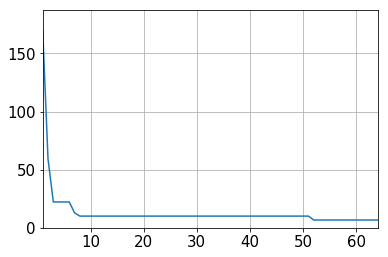

In [12]:
# set test function
tf = Himmelblaus

x0 = np.array([[0,0]])
y0 = tf(x0)

test_box = np.array([[-4,-4],[4,4]])

steps = 64
eta_arr = np.zeros(0)
steps_to_min = 0

try:
    for k in range(steps):
        
        theta_prior = np.array([1, 1, 1, 1, np.mean(np.mean(y0))])

        x_next, eta, rhos, theta_S, x0, y0 = gpgo.oneStepLookahead(tf, x0, y0, theta_prior, test_box, disp = False)

        print ('Step', k+1)

        if (eta_arr.shape[0] > 0 and eta < eta_arr[-1]):
            steps_to_min = k+1
        eta_arr = np.hstack((eta_arr, np.array([eta])))

        if (np.isscalar(x_next)):
            x_next = np.array([x_next])
        x_next = x_next.reshape((1, -1))

        #gpgo.plotOneStepLookahead2D(10, tf, x_next, eta, rhos, theta_S, x0, y0, test_box=test_box)

        # add next evaluation point
        x0 = np.vstack((x0, x_next))
        y0 = tf(x0)

except Exception as e:
    print ('\nERROR: ', e)
    plt.axvline(x=k, color='r')
        
        
#print ('\nminimal evaluation: ', eta, '@ x_opt =', x0[y0 == eta])

print ('\nSteps to current minimum:', steps_to_min)

for k in range(10):
    y_opt_k = np.sort(y0, None)[k]
    print ('\n',k+1,') minimal evaluation: ', y_opt_k, '@ x_opt =', x0[y0 == y_opt_k])

plt.plot(range(1, eta_arr.shape[0]+1), eta_arr)
plt.xlim(1, steps)
plt.ylim(0, eta_arr.max()*1.1)
plt.grid(True)